## Global Air Pollution from 2010-2017 @Wealthy_Waste

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/PM2.5 Global Air Pollution 2010-2017.csv


Credits to the dataset goes to - "Karl Weinmeister". Please find the dataset attached at - https://www.kaggle.com/kweinmeister/pm25-global-air-pollution-20102017. The data has been edited and modified to suit the purpose of the project. 

### Reading the data

In [18]:
df = pd.read_csv('/kaggle/input/PM2.5 Global Air Pollution 2010-2017.csv')
df.head()

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,Angola,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
2,Albania,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
3,Andorra,AND,12.807198,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
4,United Arab Emirates,ARE,38.980068,39.193430,39.277128,39.608155,37.983421,42.334990,40.522103,40.917510


This data is a measure of mean annual exposure (micrograms per cubic meter) of PM2.5 across several countries from the year 2010 to 2017.
PM2.5 also called as Particulate Matter 2.5, is  a mixture of solid, liquid and aerosol particles that are suspended in the air. The 2.5 refers to their diameter of 2.5 micrometer. PM 2.5 is probably the most important factor in air pollution detection. 

For more information regarding PM 2.5 please visit - https://www.airveda.com/blog/what-is-pm2-5-and-why-is-it-important

### Performing preliminary EDA 

In [19]:
df.shape

(197, 10)

In [20]:
df.describe()

,2010,2011,2012,2013,2014,2015,2016,2017
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,28.415992,28.682930,28.088689,27.459933,26.432679,28.237728,26.892416,27.010192
std,16.833998,16.764867,17.047064,16.795223,16.233806,19.058058,18.455679,18.779664
min,7.152866,7.283700,6.601134,6.278689,6.180830,6.063834,5.893757,5.861331
25%,16.009319,16.147052,15.397161,14.931400,14.188074,14.384802,13.447472,13.404151
50%,24.851829,24.787320,23.802010,23.274226,22.614164,22.569793,21.343932,21.381102
75%,34.456970,34.191866,33.415495,33.492964,33.448283,36.305381,36.033701,34.778700
max,100.784428,100.766061,96.963291,95.313986,98.116017,97.432289,98.054714,99.734374


In [21]:
df.isnull().sum().sum()

0

Preliminary EDA Conclusions - The data consists of 197 rows and 10 columns, 8 of which represent the mean pollution level from the year 2010 to 2017. The 197 rows indicate the 197 different countries the data has beem collected for. There is no missing data and since the mean of all the data is almost similar, no normalization is required. 

### Exploring the data to find most polluted countries by mean

In [22]:
mean_val = pd.Series([],dtype='float')

#The dataframe has 240 rows
for i in range(0,df.shape[0]):
    mean = pd.Series(df.iloc[i][2:10].mean())
    mean_val = mean_val.append(mean,ignore_index=True)

In [23]:
df['mean_val'] = mean_val
df_pol = df.sort_values(['mean_val'],axis=0,ascending = False)
df_pol.reset_index(inplace=True)
df_pol.drop("index",axis=1,inplace=True)

df_pol.astype( {'2010': 'float64' , '2011': 'float64' , '2012' : 'float64' , '2013': 'float64' , '2014': 'float64',
                  '2015': 'float64' , '2016': 'float64' , '2017': 'float64' , 'mean_val': 'float64'}  ).dtypes
df_pol.head()

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,mean_val
0,Nepal,NPL,100.784428,100.766061,96.963291,95.313986,98.116017,96.252768,98.054714,99.734374,98.248205
1,India,IND,95.758179,97.599379,88.169441,91.804792,89.622383,89.303334,89.672177,90.873210,91.600362
2,Qatar,QAT,84.122902,81.273006,89.246971,88.890515,78.832840,94.403891,88.222447,91.187328,87.022488
3,Saudi Arabia,SAU,81.699182,82.419032,85.513303,83.630992,75.608441,97.432289,84.465775,87.945447,84.839308
4,"Egypt, Arab Rep.",EGY,77.446619,70.786356,72.790569,76.213654,76.559601,88.213388,88.148500,86.999452,79.644767


### Arranging the data to help in Visualization

In [24]:
#Arranging the data
c_names = pd.Series(['Years'],dtype='object')
for i in range (0,10):
    ser = pd.Series(df_pol.iloc[i][0] + " (" + df_pol.iloc[i][1] + ")")
    c_names = c_names.append(ser)
    
df_arr10 = pd.DataFrame( columns = c_names )
df_arr10['Years'] = pd.Series(['2010','2011','2012','2013','2014','2015','2016','2017'],dtype='int')
for i in range(0,10):
    df_arr10[df_arr10.columns[i+1]] = df_pol.iloc[i][2:10].values

df_arr10 = df_arr10.apply(pd.to_numeric, errors='coerce')
df_arr10.head()

/opt/conda/lib/python3.7/site-packages/numpy/core/numeric.py:2327: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


,Years,Nepal (NPL),India (IND),Qatar (QAT),Saudi Arabia (SAU),"Egypt, Arab Rep. (EGY)",Niger (NER),Bahrain (BHR),Bangladesh (BGD),Cameroon (CMR),Iraq (IRQ)
0,2010,100.784428,95.758179,84.122902,81.699182,77.446619,69.150177,65.630881,70.764996,59.293403,68.711405
1,2011,100.766061,97.599379,81.273006,82.419032,70.786356,72.982767,63.732499,70.210549,58.076901,66.362610
2,2012,96.963291,88.169441,89.246971,85.513303,72.790569,72.544645,70.287483,70.793909,62.776697,66.842077
3,2013,95.313986,91.804792,88.890515,83.630992,76.213654,63.031717,67.794678,65.645083,58.186338,63.802696
4,2014,98.116017,89.622383,78.832840,75.608441,76.559601,60.541357,62.758544,68.395377,56.715306,56.567030


### Plotting the data

The data contains 200 rows i.e. 200 different countries. Plotting all of them would be horrendous use of space. Hence, plotting the pollution over the years for the 10 most polluted countries

In [25]:
color_list = ['#e6b0aa','#78281f','#d7bde2','#4a235a','#196f3d','#3498db','#a3e4d7','#e74c3c','#f9e79f','#2c3e50']

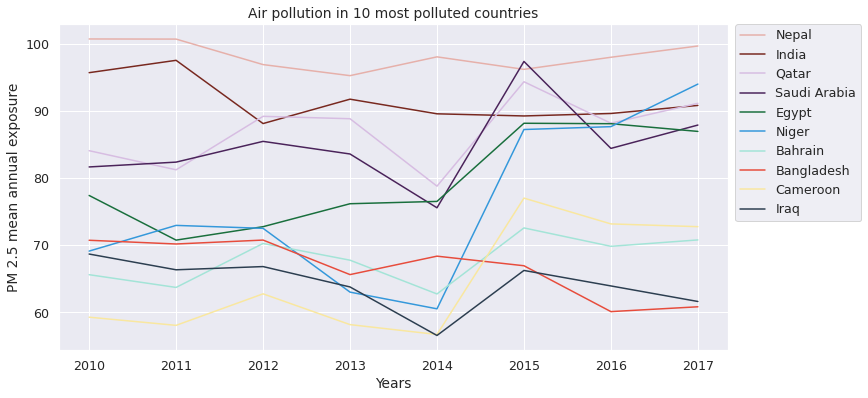

In [26]:
#Running this code cell with Shift+Enter once might result in the axis labels being black. 
#Run this code cell again to observe the correct plot. 

plt.figure(figsize=(12,6))
sns.set(font_scale=1.15)

for i in range(1,11):
    ax = sns.lineplot(x = 'Years' , y = df_arr10.columns[i] , color = color_list[i-1], data = df_arr10)
    
ax.set(xlabel = 'Years', ylabel = 'PM 2.5 mean annual exposure' , title = 'Air pollution in 10 most polluted countries')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0,
           labels=['Nepal','India','Qatar','Saudi Arabia','Egypt','Niger','Bahrain','Bangladesh','Cameroon','Iraq'])

plt.show()

By observing the lineplot, we can deduce the following points - 
* **Nepal** is the most polluted country across the timespan of 2010-2017. 
* In 2015, **Saudi Arabia** caused more pollution than Nepal. However, the pollution level of Saudi Arabia decreased after 2015.
* **Niger** and **Cameroon** faced the highest rise in pollution level from 2010 to 2017. The pollution of **Niger** rapidly increased to become the 2nd most polluted country in   2017.
* **Bangladesh** and **Iraq** were able to reduce their annual pollution level accross the timespan of 2010 to 2017

### Exploring the data to find changes in pollution level

A country's growth can be identified by its change in pollution levels. Decrease in pollution level hints that the country is taking adequate steps to counter its pollution. While an increase or no change in its pollution level indicates that the country isn't taking adequate steps to counter pollution  

In [27]:
df['Change in Pollution'] = df['2010'] - df['2017']
df.head()

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,mean_val,Change in Pollution
0,Afghanistan,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808,61.616510,8.334783
1,Angola,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505,33.106081,1.398742
2,Albania,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603,19.919271,3.077226
3,Andorra,AND,12.807198,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621,11.644685,2.499576
4,United Arab Emirates,ARE,38.980068,39.193430,39.277128,39.608155,37.983421,42.334990,40.522103,40.917510,39.852101,-1.937441


In [28]:
df_ch = df.sort_values(['Change in Pollution'],axis=0,ascending = False)
df_ch.reset_index(inplace=True)
df_ch.drop("index",axis=1,inplace=True)
df_ch.tail()

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,mean_val,Change in Pollution
192,Chad,TCD,56.586627,55.195160,58.675388,53.056407,51.247169,68.682394,64.770769,66.029206,59.280390,-9.442578
193,"Egypt, Arab Rep.",EGY,77.446619,70.786356,72.790569,76.213654,76.559601,88.213388,88.148500,86.999452,79.644767,-9.552833
194,Cameroon,CMR,59.293403,58.076901,62.776697,58.186338,56.715306,77.051743,73.205291,72.793096,64.762347,-13.499693
195,Nigeria,NGA,52.609064,50.973089,56.129638,49.740689,48.633374,75.398992,71.369601,71.798174,59.581578,-19.189110
196,Niger,NER,69.150177,72.982767,72.544645,63.031717,60.541357,87.281282,87.708472,94.053818,75.911779,-24.903641


From the data it can be inferred that **Sri Lanka** and **China** were succesful in reducing the pollution level by a huge margin which hints at a proper management of pollution.
Similarly, it can also be inferred that **Cameroon**, **Nigeria** and **Niger** were unsuccesful in maintaining their pollution levels

### Plotting the world average across the years

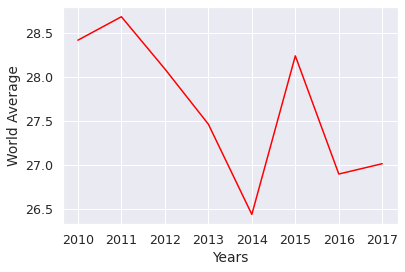

In [29]:
world_avg = []
for i in range(2,10):
    world_avg.append(df[df.columns[i]].mean())

df_world = pd.DataFrame(columns=['Years','World Average'])
df_world['Years'] = df.columns[2:10]
df_world['World Average'] = pd.Series(world_avg,dtype=float)

sns.lineplot(x = 'Years', y = 'World Average', data=df_world, color='Red')

From the above plot of the world average, it can be deduced that the average world air pollution has decreased in 2017 as compared to that of 2010. There was a steep decrease till 2014, but 2015 saw a spike in the average pollution level which was later maintained in 2016 and 2017. 

### Clustering of countries to identify similar patterns
Clustering is a form of unsupervised learning that is used to detect patterns and clusters in data which generally can't be divided into groups or clusters. Here, clustering of the data is very important as it might help in grouping the data in multiple clusters and these clusters can give a generic idea of the conditon of the countries that fall in that cluster 

The Clustering algorithm used is KMeans. This is because other algorithms like Agglomerative Clustering or DBSCAN performs well with Density based data and bad with condensed data like we have here. Using density based algorithms would result in incorrect clustering or in the worst case they might fail to cluster the data at all. Hence the KMeans algorithms is used.

Identifying optimal k value by elbow point method. The metric used is SSE i.e. Sum of Squared Error

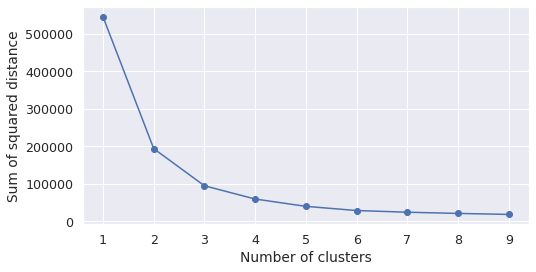

In [30]:
df_cluster = df.drop(['Country Name', 'Country Code'], 1)

sse = []
list_k = list(range(1, 10, 1))

for k in list_k:
    km = KMeans(n_clusters=k,random_state=0)
    km.fit(df_cluster)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance');

From the above plot it can be identified that the elbow point rests at k = 3. Hence the number of clusters to be done is 3

In [31]:
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(df_cluster)
df['Cluster Label'] = kmeans.labels_.astype(int)
df.head() 

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,mean_val,Change in Pollution,Cluster Label
0,Afghanistan,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808,61.616510,8.334783,1
1,Angola,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505,33.106081,1.398742,2
2,Albania,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603,19.919271,3.077226,0
3,Andorra,AND,12.807198,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621,11.644685,2.499576,0
4,United Arab Emirates,ARE,38.980068,39.193430,39.277128,39.608155,37.983421,42.334990,40.522103,40.917510,39.852101,-1.937441,2


### Cluster Exploration

Dividing the dataframe into 3 separate cluster dataframes

In [32]:
df_cluster0 = df[df['Cluster Label'] == 0]
df_cluster1 = df[df['Cluster Label'] == 1]
df_cluster2 = df[df['Cluster Label'] == 2]

print(df_cluster0.shape)
print(df_cluster1.shape)
print(df_cluster2.shape)

(119, 13)
(16, 13)
(62, 13)


Cluster 0 has 119 elements whereas cluster 1 and cluster 2 have 16 and 62 respectively

### Cluster Labeling

WHO has officially set the safety value of annual PM 2.5 output as 35 micrograms per cubic metre of air 

In [33]:
#Cluster 0
print('Cluster0')
print(df_cluster0['mean_val'].min())
print(df_cluster0['mean_val'].max(),"\n")

#Cluster 1
print('Cluster1')
print(df_cluster1['mean_val'].min())
print(df_cluster1['mean_val'].max(),"\n")

#Cluster 2
print('Cluster2')
print(df_cluster2['mean_val'].min())
print(df_cluster2['mean_val'].max())

Cluster0
6.4551770735
26.55007757625 

Cluster1
59.28038986125
98.248204775 

Cluster2
27.610207251250003
53.56162257875


By observing the maximum and minimum annual average PM 2.5 release for the 3 clusters, the following inferences can be made - 

### Cluster 0 - Lowly Polluted Countries  
Cluster 0 has the smallest span between minimum and maximum average PM 2.5 release. The maximum average value in cluster 0 is 26.5 which is much smaller then the WHO certified safety level. Hence the countries in cluster 0 are the ones that the lowest amount of annual PM 2.5 outlet.

### Cluster 1 - Highly Polluted Countries
Cluster 1 has the highest annual average of PM 2.5 release. The maximum value is way of limits. Even the minimum value is way more than the safety value set by WHO.  

### Cluster 2 - Averagely Polluted Countries
Cluster 2 has the biggest span of average annual PM 2.5 release. While the minimum value is lower than the safety value, the maximum is way more then the safety value.

### The Classification model

Defining the features and target variable

In [40]:
features = ['2010','2011','2012','2013','2014','2015','2016','2017','mean_val','Change in Pollution']
X = df[features]
y = df['Cluster Label']

Choosing the optimal classification model

In [42]:
#Random Forest Classification

from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Rfc_model = RandomForestClassifier(n_estimators = 400,max_depth=10,n_jobs= -1,random_state=0)
scores = cross_val_score(Rfc_model,X,y,cv=5,scoring='f1_macro')
print('macro average - ',scores.mean())
scores = cross_val_score(Rfc_model,X,y,cv=5,scoring='f1_micro')
print('micro average - ',scores.mean())

macro average -  0.9800493827160495
micro average -  0.9897435897435898


In [43]:
#K-Nearest Neighbours (KNN)

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5,leaf_size = 50,n_jobs=-1)
scores_KNN = cross_val_score(knn_model,X,y,cv=5,scoring='f1_macro')
print('macro average - ',scores_KNN.mean())
scores_KNN = cross_val_score(knn_model,X,y,cv=5,scoring='f1_micro')
print('micro average - ',scores_KNN.mean())

macro average -  1.0
micro average -  1.0


In [44]:
#Logistic Regression

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

LoReg_model = LogisticRegression(random_state = 3,n_jobs = -1)
scores_LR = cross_val_score(LoReg_model,X,y,cv=5,scoring='f1_macro')
print('macro average - ',scores_LR.mean())
scores_LR = cross_val_score(LoReg_model,X,y,cv=5,scoring='f1_micro')
print('micro average - ',scores_LR.mean())

macro average -  0.7628766909062475
micro average -  0.8732051282051282


From the above models it can be seen that Random Forest performs very well with the data and KNN exactly fits the data. However, since both of them have such a high degree of accuracy, they are prone to over-fitting. This can be avoided by using Logistic Regression.

Setting up the final model

In [48]:
final_model = LogisticRegression(random_state = 3,n_jobs = -1)
final_model.fit(X,y);

The model has been fit with the test data. For a country not present in the data, if we have the annual PM 2.5 outlet for the country from 2010 - 2017, we can predict which Cluster it belongs to. 

Setting up the prediction data

In [52]:
#Replace this data with the country data
data_dict = {'Country Name' : 'Vatican City',
             'Country Code' : 'VCY',
             '2010' : 25.4,
             '2011' : 22.4,
             '2012' : 21.3,
             "2013" : 14.85,
             '2014' : 13.6,
             '2015' : 10.85,
             '2016' : 9.45,
             '2017' : 11.25}

In [54]:
df_test = pd.DataFrame(columns = df.columns[:12])
df_test = df_test.append(data_dict,ignore_index=True)
df_test['Change in Pollution'] = df_test['2010'] - df_test['2017']
df_test['mean_val'] = df_test.iloc[0][2:10].mean()
df_test

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,mean_val,Change in Pollution
0,Vatican City,VCY,25.4,22.4,21.3,14.85,13.6,10.85,9.45,11.25,16.1375,14.15


Predicting cluster label

In [55]:
X_test = df_test[features]
clu = final_model.predict(X_test)
if(clu == 0):
    print('Lowly Polluted Country')
if(clu == 1):
    print('Highly Polluted Country')
if(clu == 2):
    print('Averagely Polluted Country')

Lowly Polluted Country


### Hence, by using Unsupervised Learning and Classification models, we can cluster the World Air Pollution data into 3 clusters and for a new data, we can predict which group/cluster it belongs to, using Classification. 

#### THANK YOU